# Highlight areas of the pitch that each team lost possession of the ball during the 2022 WC. Link to team performance

In [1]:
%matplotlib inline

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsbombpy import sb
from mplsoccer import Pitch, Sbopen, VerticalPitch
import seaborn as sns

In [3]:
# getting the df of the 64 matches played in the WC
wc22=sb.matches(competition_id=43,season_id=106)

In [4]:
#declare mplsoccer parser
parser = Sbopen()

In [5]:
# list of match_ids in the wc
match_ids = wc22['match_id'].to_list()

### Getting all passes made through out the tournament

In [6]:
#declare an empty dataframe
passes = pd.DataFrame()
for idx in match_ids:
    #open the event data from this game
    df = parser.event(idx)[0]
    # Getting all the passes
    df_pass = df[df['type_name'] == 'Pass']
    # Taking relevant columns
    df_pass=df_pass[['possession_team_name','type_name','sub_type_name','outcome_name','x','y']]

    #concatenate dataframe with a previous one to keep danger passes from the whole tournament
    passes = pd.concat([passes, df_pass])

In [7]:
# Arranging team names in alphabetical order
passes=passes.sort_values('possession_team_name')

# Filter for lost possession
lost_passes = passes.loc[passes['outcome_name'].isin(['Incomplete','Out'])]

### Where do you each of the 32 teams lose the ball and at what frequency?

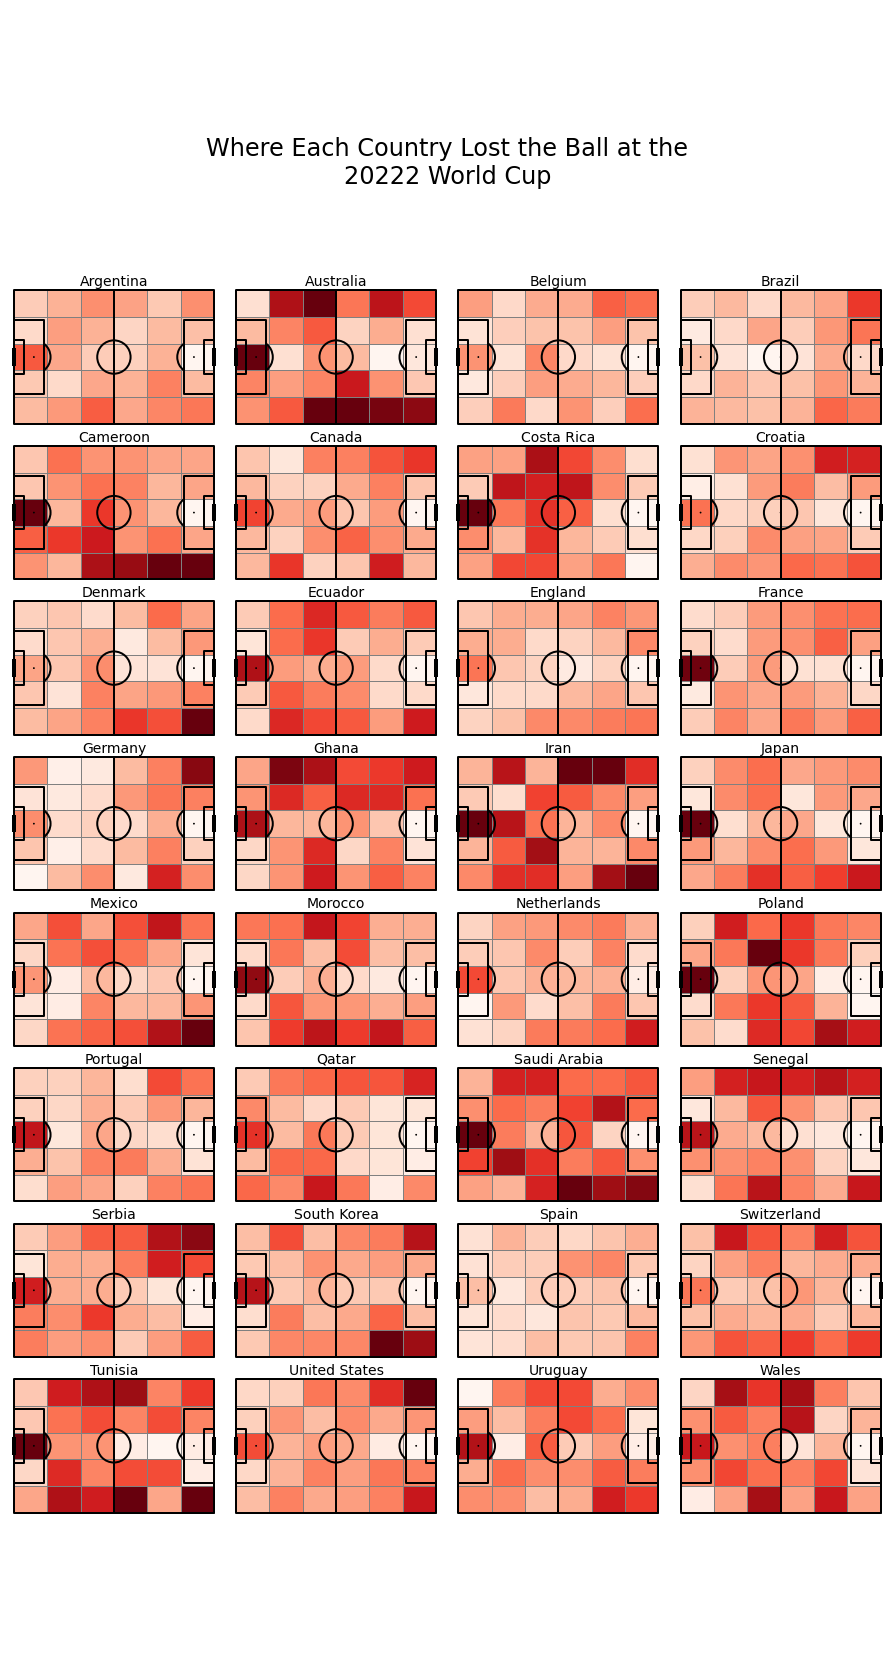

In [48]:
#get the list of teams
names = lost_passes['possession_team_name'].unique()

pitch = Pitch(line_zorder=2, line_color='black')
fig, axs = pitch.grid(ncols = 4, nrows = 8,figheight=24, axis=False)

#for each team name
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put team name over the plot
    ax.text(60, -5, name,ha='center',va='center',fontsize=14)
    #take only passes by this team
    team_df = lost_passes.loc[lost_passes["possession_team_name"] == name]
    #get the 2D histogram 
    bin_statistic = pitch.bin_statistic(team_df.x, team_df.y, statistic='count', bins=(6, 5), normalize=False)
    #normalize by number of total passes by each team
    bin_statistic["statistic"] = bin_statistic["statistic"]/passes['possession_team_name'].value_counts()[name]
    #make a heatmap
    pcm = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax,vmax=0.015)

fig.suptitle('Area Where Each Country Loses the Ball\n20222 World Cup', y=0.9,fontsize= 24,fontweight='bold')
plt.savefig("wc22_lostpass",bbox_figure="tight",dpi=300)    
plt.show()

### Dividing the plot into 2 to make it more viewable

In [14]:
# Countries divided into 2 alphabetically
first_set=names[0:16]
second_set=names[16:32]

In [15]:
# The dfs of lost passes
df1=lost_passes[lost_passes['possession_team_name'].isin(first_set)]
df2=lost_passes[lost_passes['possession_team_name'].isin(second_set)]

#### First set of teams

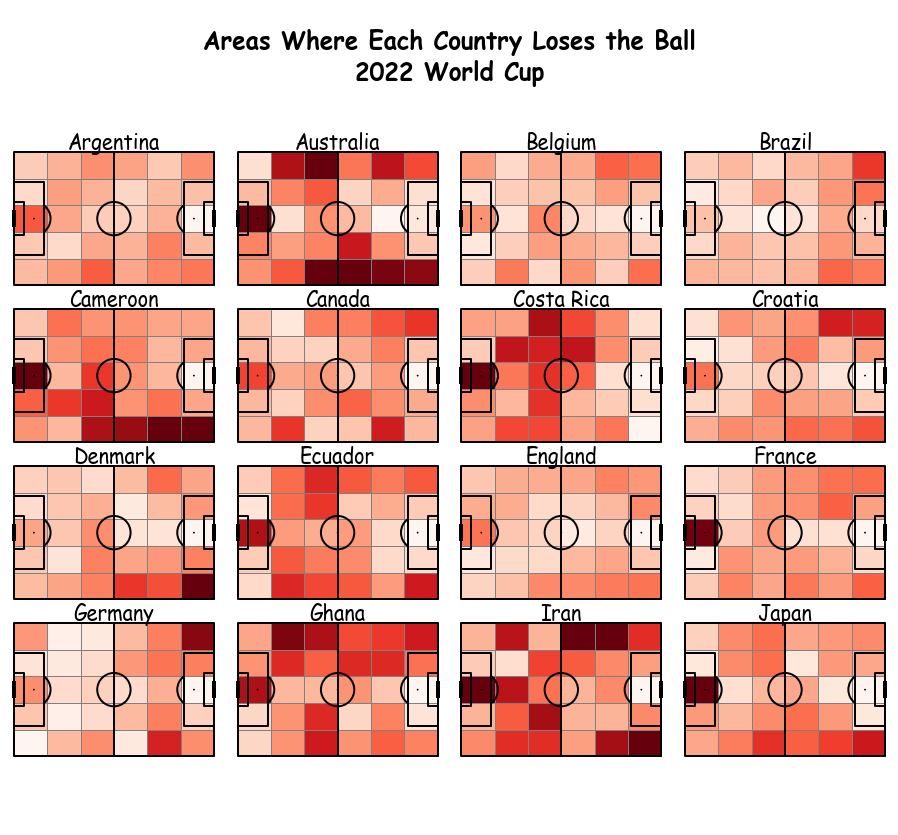

In [51]:
#get the list of teams
names = df1['possession_team_name'].unique()

pitch = Pitch(line_zorder=2, line_color='black')
fig, axs = pitch.grid(ncols = 4, nrows = 4,figheight=12, axis=False)

#for each team name
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put team name over the plot
    ax.text(60, -5, name,ha='center',va='center',fontdict={'fontsize':20,'fontfamily':'Comic Sans MS'})
    #take only passes by this team
    team_df = df1.loc[df1["possession_team_name"] == name]
    #get the 2D histogram 
    bin_statistic = pitch.bin_statistic(team_df.x, team_df.y, statistic='count', bins=(6, 5), normalize=False)
    #normalize by number of total passes by each team
    bin_statistic["statistic"] = bin_statistic["statistic"]/passes['possession_team_name'].value_counts()[name]
    #make a heatmap
    pcm = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax,vmax=0.015)

fig.suptitle('Area Where Each Country Loses the Ball\n2022 World Cup', y=0.95,fontsize= 24,fontfamily='Comic Sans MS',fontweight='bold')
plt.savefig("wc22_lostpass1",bbox_figure="tight",dpi=300)    
plt.show()

#### Second set of teams

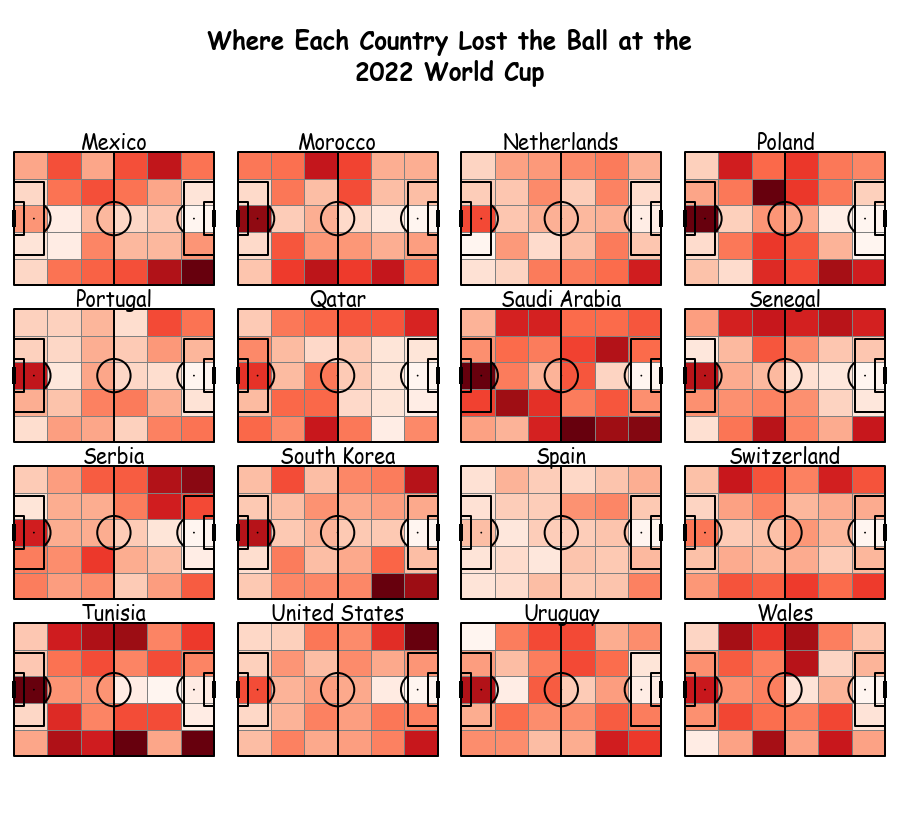

In [50]:
#get the list of teams
names = df2['possession_team_name'].unique()

pitch = Pitch(line_zorder=2, line_color='black')
fig, axs = pitch.grid(ncols = 4, nrows = 4,figheight=12, axis=False)

#for each team name
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put team name over the plot
    ax.text(60, -5, name,ha='center',va='center',fontdict={'fontsize':20,'fontfamily':'Comic Sans MS'})
    #take only passes by this team
    team_df = df2.loc[df2["possession_team_name"] == name]
    #get the 2D histogram 
    bin_statistic = pitch.bin_statistic(team_df.x, team_df.y, statistic='count', bins=(6, 5), normalize=False)
    #normalize by number of total passes by each team
    bin_statistic["statistic"] = bin_statistic["statistic"]/passes['possession_team_name'].value_counts()[name]
    #make a heatmap
    pcm = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax,vmax=0.015)

fig.suptitle('Area Where Each Country Loses the Ball\n2022 World Cup', y=0.95,fontsize= 24,fontfamily='Comic Sans MS',fontweight='bold')
plt.savefig("wc22_lostpass2",bbox_figure="tight",dpi=300)    
plt.show()